In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score

In [2]:
X, Y = datasets.load_iris(return_X_y=True)
U = decomposition.PCA(n_components=2).fit_transform(X)

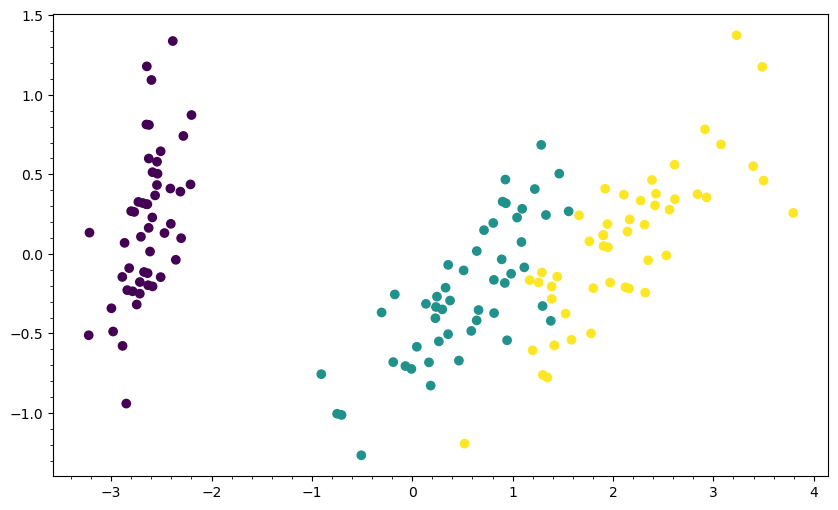

In [3]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U[:,0], U[:,1], c=Y, s=36)
plt.minorticks_on()
plt.show()

In [4]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)
Y2 = Y2.astype('d')
N = len(Y2)

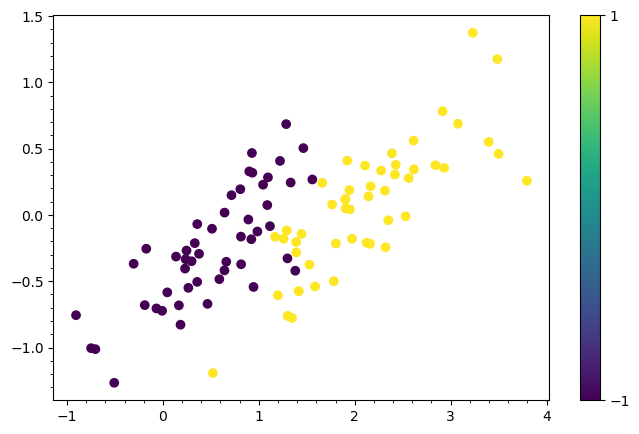

In [5]:
plt.figure(figsize=(8,5))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [6]:
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.cls as cls
import mlgrad.regr as regr
from mlgrad.af import averaging_function
import mlgrad.gd as gd

In [7]:
def calc_zz(mod, xr, yr):
    xrange = np.linspace(xr[0], xr[1], 101)
    yrange = np.linspace(yr[0], yr[1], 101)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate_all(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

In [8]:
mod = models.LinearModel(2)

In [9]:
alg = cls.classification_as_regr(U2, Y2, mod, 
                        loss.MarginLoss(funcs.Hinge(0.0)), 
                        # normalizer=gd.LinearModelNormalizer(),
                        h=0.1, n_iter=5000)
mod.param.base[:] = mod.param.base / np.sqrt(np.sum(mod.param.base[1:]**2))
print(np.sqrt(np.sum(mod.param.base[1:]**2)))

1.0


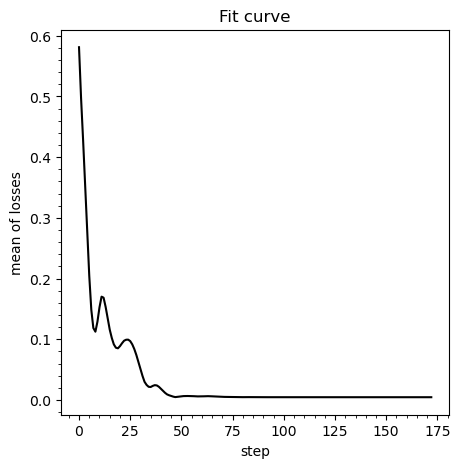

In [10]:
regr.plot_losses(alg, U2, Y2)

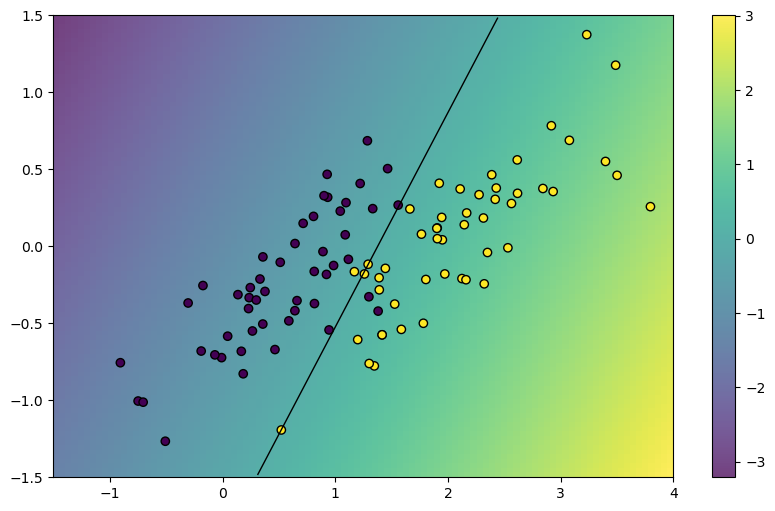

In [11]:
ZZ = calc_zz(mod, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75, aspect='auto')
plt.colorbar(cb)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 21), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
plt.show()

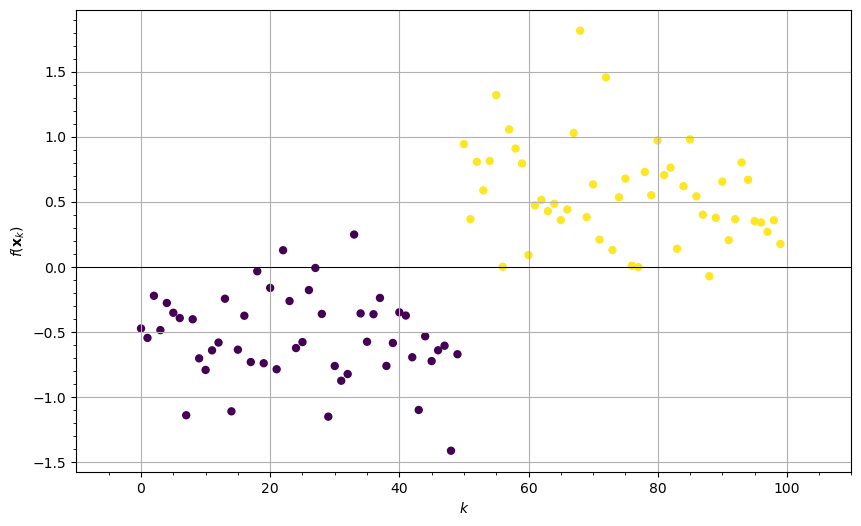

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(range(N), mod.evaluate_all(U2), c=Y2, s=25)
plt.hlines(0, -10, N+10, colors='k', linewidths=0.75)
plt.minorticks_on()
plt.grid(1)
plt.xlim(-10, N+10)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(\mathbf{x}_k)$')
plt.show()

In [13]:
accuracy_score(Y2, np.sign(mod.evaluate_all(U2)))

0.95

In [14]:
m_mod = models.LinearModel(2)

In [15]:
m_alg = cls.classification_as_m_regr(U2, Y2, m_mod,
                                 lossfunc=loss.NegMargin(),
                                 avrfunc=averaging_function("SoftMax", args=(10,)), 
                                 # normalizer=gd.LinearModelNormalizer(),
                                 h=0.1, n_iter=5000)

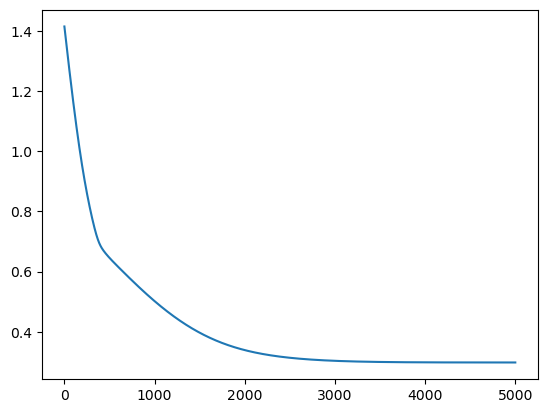

In [16]:
plt.plot(m_alg.lvals)
plt.show()

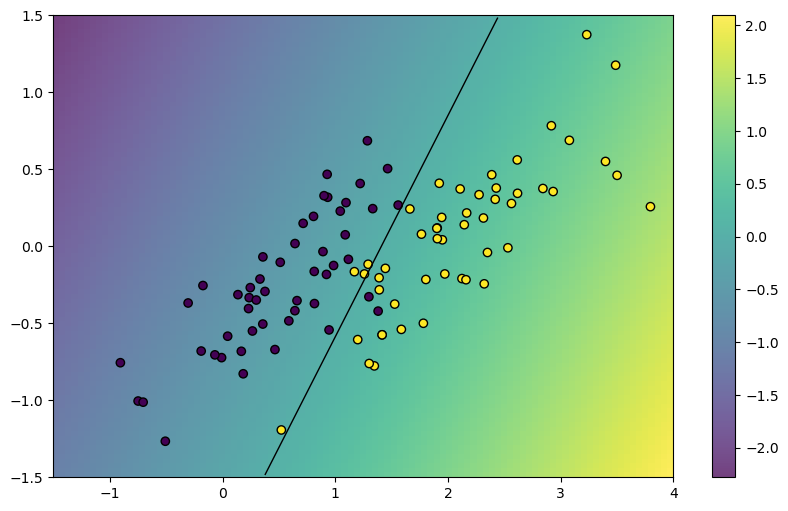

In [17]:
ZZ = calc_zz(m_mod, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75, aspect='auto')
plt.colorbar(cb)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 41), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.show()

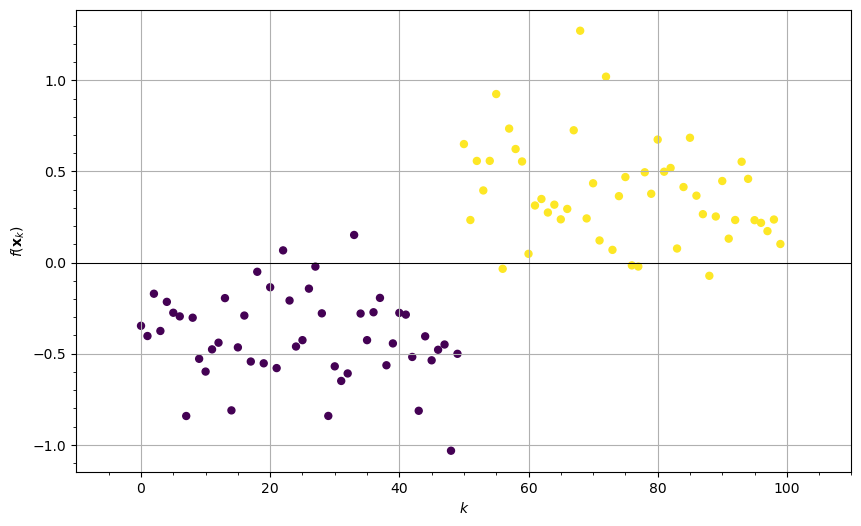

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(range(N), m_mod.evaluate_all(U2), c=Y2, s=25)
plt.hlines(0, -10, N+10, colors='k', linewidths=0.75)
plt.minorticks_on()
plt.grid(1)
plt.xlim(-10, N+10)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(\mathbf{x}_k)$')
plt.show()

In [19]:
accuracy_score(Y2, np.sign(m_mod.evaluate_all(U2)))

0.94

In [88]:
sigmoidal_func = funcs.Sigmoidal(2.0)
l_mod = models.SigmaNeuronModel(sigmoidal_func, 2)

In [89]:
l_alg = cls.classification_as_regr(U2, Y2, l_mod, 
                        loss.NegMargin(), 
                        # normalizer=gd.LinearModelNormalizer(),
                        h=0.1, n_iter=5000)
l_mod.param.base[:] = l_mod.param.base / np.sqrt(np.sum(l_mod.param.base[1:]**2))

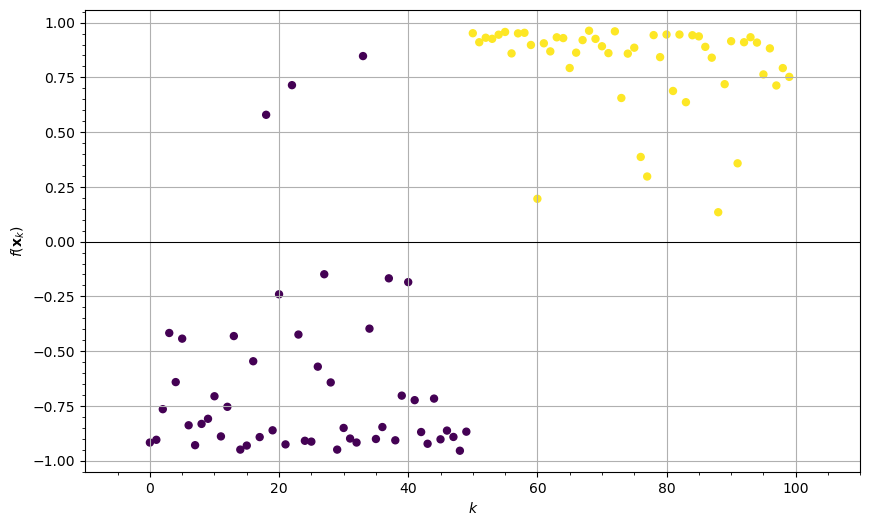

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(range(N), sigmoidal_func.evaluate_array(l_mod.evaluate_all(U2)), c=Y2, s=25)
plt.hlines(0, -10, N+10, colors='k', linewidths=0.75)
plt.minorticks_on()
plt.grid(1)
plt.xlim(-10, N+10)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(\mathbf{x}_k)$')
plt.show()

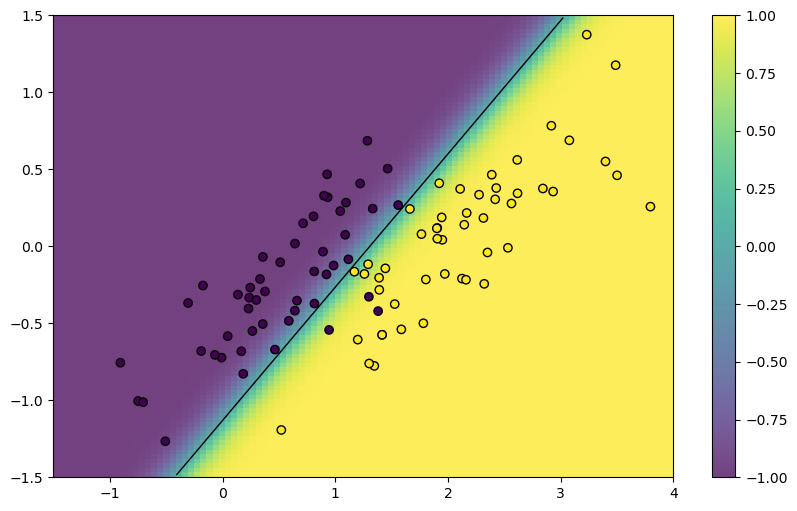

In [60]:
ZZ = calc_zz(l_mod, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75, aspect='auto')
plt.colorbar(cb)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 41), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.show()

In [61]:
accuracy_score(Y2, np.sign(l_mod.evaluate_all(U2)))

0.97

In [76]:
l2_mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), 2)

In [77]:
l2_alg = regr.regression(U2, Y2, l2_mod, 
                        loss.SquareErrorLoss(), 
                        # normalizer=gd.LinearModelNormalizer(),
                        h=0.1, n_iter=5000)
l2_mod.param.base[:] = l2_mod.param.base / np.sqrt(np.sum(l2_mod.param.base[1:]**2))

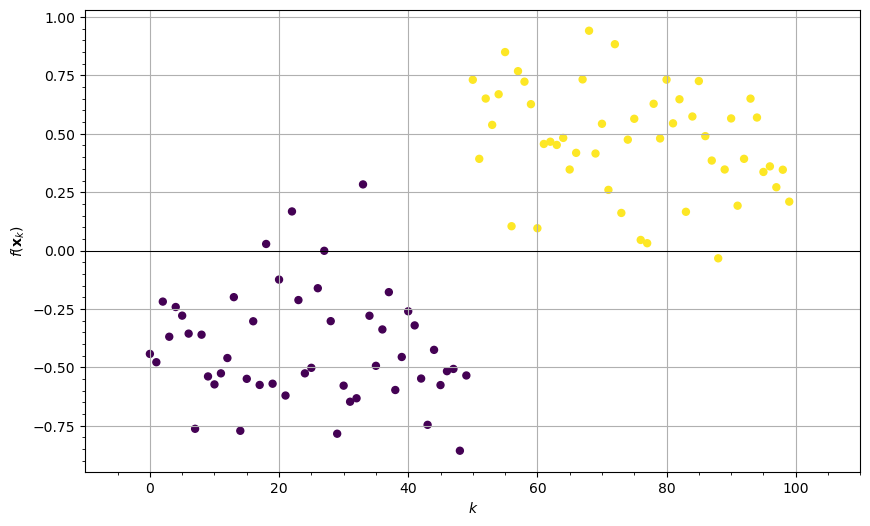

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(range(N), l2_mod.evaluate_all(U2), c=Y2, s=25)
plt.hlines(0, -10, N+10, colors='k', linewidths=0.75)
plt.minorticks_on()
plt.grid(1)
plt.xlim(-10, N+10)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(\mathbf{x}_k)$')
plt.show()

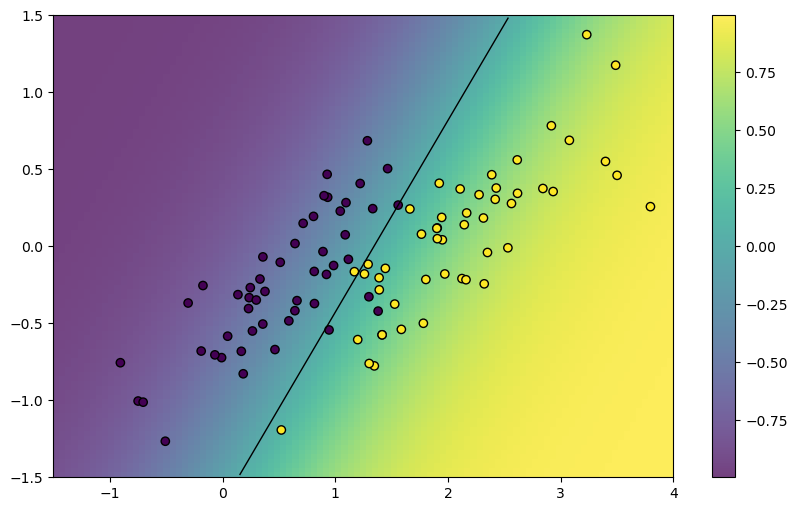

In [79]:
ZZ = calc_zz(l2_mod, [-1.5, 4], [-1.5, 1.5])
extent = (-1.5, 4, -1.5, 1.5)
plt.figure(figsize=(10,6))
plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=36)
cb = plt.imshow(ZZ, origin='lower', extent=extent, alpha=0.75, aspect='auto')
plt.colorbar(cb)
plt.contour(ZZ, levels=[0], origin='lower', extent=extent, linewidths=1, colors='k')
# plt.contour(ZZ, levels=np.linspace(-2, 2, 41), origin='lower', extent=extent, linewidths=0.5, linestyles='--')
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.show()

In [80]:
accuracy_score(Y2, np.sign(l2_mod.evaluate_all(U2)))

0.96